In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



plt.rcParams["figure.figsize"] = (20,15)

Buscar un conjunto de datos a analizar
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.
Explicar los datos y las variables disponibles en el conjunto de datos seleccionado
Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.
Interpretación de los resultados.

In [2]:
df = pd.read_csv("./Datos/weather.csv")
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [3]:
df.shape

(8784, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [5]:
df.duplicated().sum()

0

Nuestro dataset consta de 8784 registros en 8 columnas. No tenemos datos nulos ni tampoco duplicados.

Date/time > categórica. Es fecha y hora que se toma el registro
Temp_C > numérica. Es la temperatura en grados centígrados
Dew Point Temp_C > numérica. El punto de rocío, en grados centígrados.
Rel Hum_% > numérica. Porcentaje de humedad relativa.
Wind speed > numérica. Velocidad del viento en km/h
Visibilidad > númérica. En km
Presión > numérica. Mediada en pascales
Weather > categórica. Predicción atmosférica

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew Point Temp_C,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Rel Hum_%,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_km,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Press_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


In [7]:
df.describe(include =object).T

,count,unique,top,freq
Date/Time,8784,8784,1/1/2012 0:00,1
Weather,8784,50,Mainly Clear,2106


Observamos en un primer análisis que nuestro dataset recoge datos climáticos de un sitio frío y de temperaturas extremas

In [8]:
df.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [9]:
df.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

Análisis visual

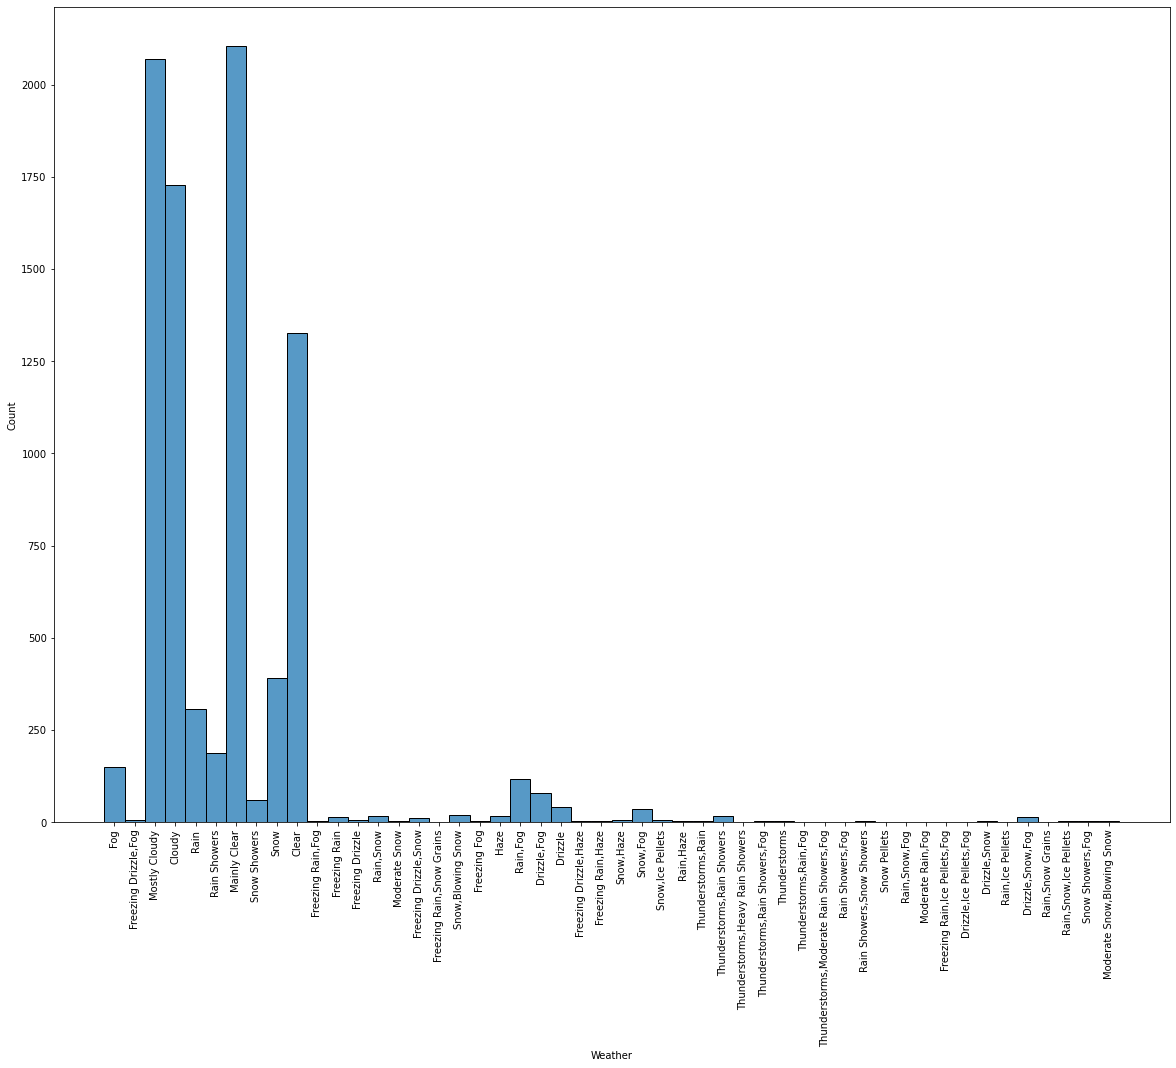

In [10]:
sns.histplot(data=df, x="Weather")

plt.xticks(rotation = 90)
plt.show();

El tiempo que más se da es "mainly clear" y "mostly cloudy". Para poder hacer una regresión logística nos quedaremos con estas dos columnas

In [11]:
df2 = df[df["Weather"].isin(["Mostly Cloudy", "Mainly Clear"])].reset_index()
df2

,index,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy
1,26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
2,27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
3,28,1/2/2012 4:00,2.9,-2.3,69,32,25.0,99.26,Mostly Cloudy
4,29,1/2/2012 5:00,2.6,-2.3,70,32,25.0,99.21,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...
4170,8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
4171,8757,12/30/2012 21:00,-13.8,-16.5,80,20,25.0,101.50,Mainly Clear
4172,8758,12/30/2012 22:00,-13.7,-16.3,81,19,25.0,101.54,Mainly Clear
4173,8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


In [12]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
index,4175.0,4509.911138,2285.791712,16.00,2639.50,4655.00,6299.50,8763.00
Temp_C,4175.0,11.575401,11.886824,-23.20,2.40,13.80,21.60,33.00
Dew Point Temp_C,4175.0,3.862850,11.073858,-28.50,-4.70,6.50,13.10,24.40
Rel Hum_%,4175.0,61.378443,15.616235,18.00,51.00,62.00,73.00,100.00
Wind Speed_km/h,4175.0,14.971976,8.421738,0.00,9.00,15.00,20.00,83.00
Visibility_km,4175.0,32.772695,11.541010,11.30,24.10,25.00,48.30,48.30
Press_kPa,4175.0,101.138050,0.753352,98.36,100.68,101.14,101.59,103.65


In [13]:
numericas = df2.select_dtypes(include= np.number)
numericas.head()

,index,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,16,2.6,-0.2,82,13,12.9,99.93
1,26,3.9,-0.9,71,32,25.0,99.26
2,27,3.7,-1.5,69,33,25.0,99.30
3,28,2.9,-2.3,69,32,25.0,99.26
4,29,2.6,-2.3,70,32,25.0,99.21


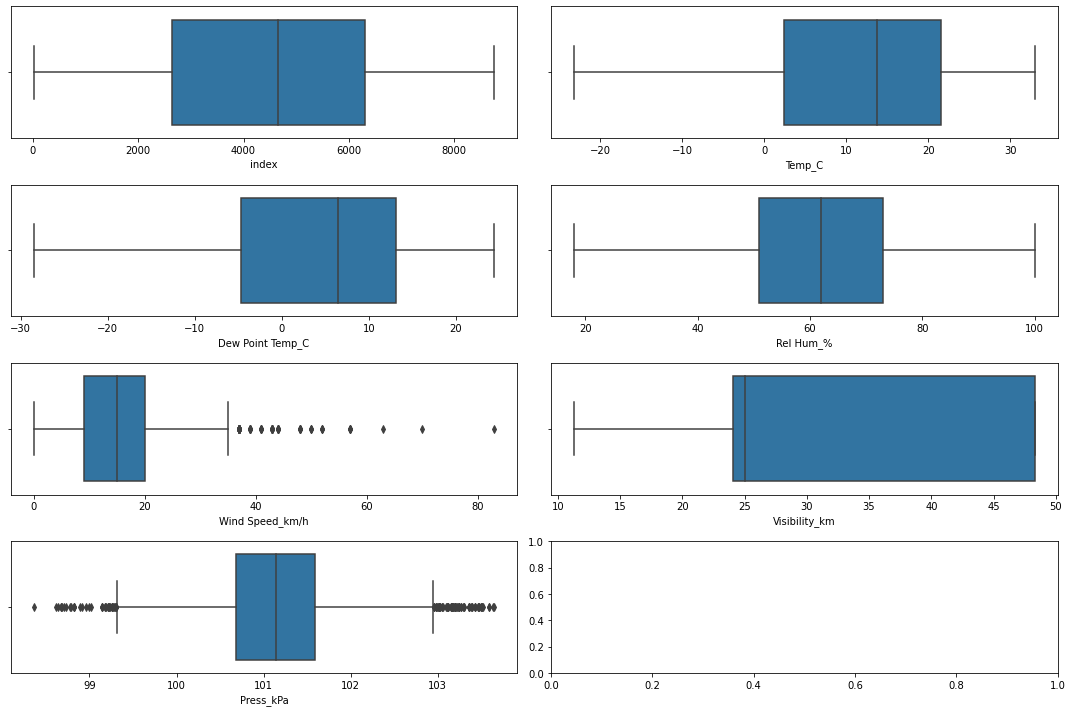

In [14]:
fig, axes = plt.subplots (nrows= 4, ncols= 2, figsize = (15,10))
axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x= columna, data = df2, ax = axes[indice])
    
plt.tight_layout()
plt.show()

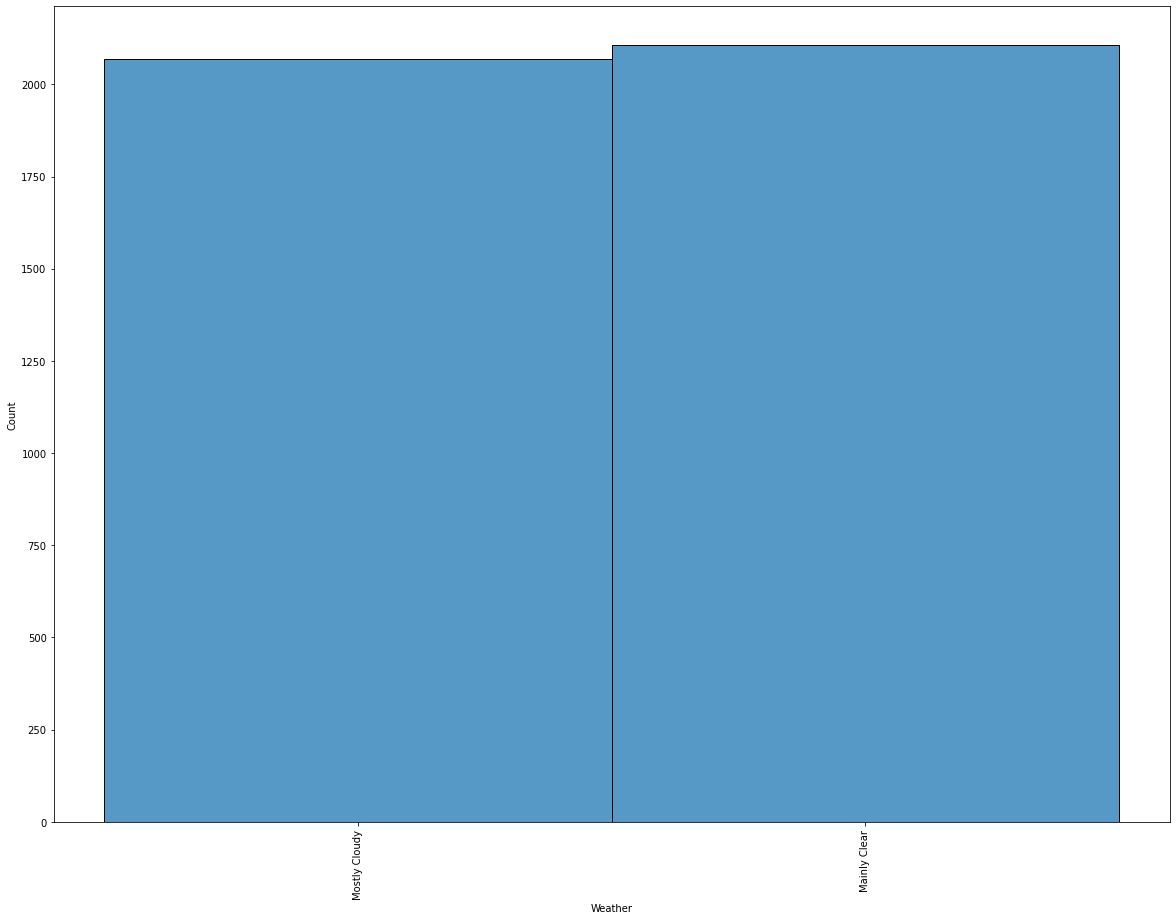

In [15]:
sns.histplot(data=df2, x="Weather")

plt.xticks(rotation = 90)
plt.show();

Vamos a revisar los outliers de "Wind_speed" (velocidad del viento) y "Press_k" (Presión atmosférica)

In [16]:
def detectar_outliers(lista_columnas, dataframe):
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila.
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    return dicc_indices, outliers_data

Sacamos los outliers de "Wind_Speed_km/h"

In [17]:
indice_viento, out_viento = detectar_outliers(["Wind Speed_km/h"], df2)

In [18]:
out_viento

,index,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
7,32,1/2/2012 8:00,1.9,-3.3,68,39,24.1,99.14,Mostly Cloudy
8,33,1/2/2012 9:00,1.8,-3.7,67,44,24.1,99.14,Mostly Cloudy
9,34,1/2/2012 10:00,1.5,-4.1,66,43,24.1,99.18,Mostly Cloudy
11,36,1/2/2012 12:00,1.7,-6.2,56,48,24.1,99.21,Mainly Clear
12,37,1/2/2012 13:00,1.1,-6.5,57,37,24.1,99.27,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...
3776,7618,11/13/2012 10:00,4.7,-1.3,65,37,24.1,102.07,Mostly Cloudy
3915,7876,11/24/2012 4:00,4.1,-2.2,63,37,25.0,99.56,Mostly Cloudy
3920,7886,11/24/2012 14:00,1.3,-6.3,57,39,24.1,99.65,Mostly Cloudy
4164,8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy


In [19]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in indice_viento.items():
    mediana = df2[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df2.loc[i,k] = mediana # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio 

Como vemos que los outliers de ambos casos están equilibrados, y que los outliers de la velocidad del viento están en la misma proporción tanti en días despejados como nublados, procedemos a sustituirlos por la mediana de la velocidad del viento (de todos los registros)

In [20]:
mediana_viento = df2["Wind Speed_km/h"].median()
mediana_viento

15.0

In [21]:
indice_presion, out_presion = detectar_outliers(["Press_kPa"], df2)

In [22]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in indice_presion.items():
    mediana = df2[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df2.loc[i,k] = mediana # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio 

In [23]:
mediana_presion = df2["Press_kPa"].median()
mediana_presion

101.14

In [25]:
df2.head()

,index,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy
1,26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,101.14,Mostly Cloudy
2,27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,101.14,Mostly Cloudy
3,28,1/2/2012 4:00,2.9,-2.3,69,32,25.0,101.14,Mostly Cloudy
4,29,1/2/2012 5:00,2.6,-2.3,70,32,25.0,101.14,Mostly Cloudy


In [24]:
df2.to_csv("./Datos/tiempo.csv")